In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

os.chdir('/workspace') # change to the root directory of the project

# Load the data

In [2]:
# Load the data
rna_seq = pd.read_csv('data/PDAC_MICRODISSEC_NAIF/StarFCGeneCount_s408.tsv', sep='\t').T

# Load the clinique data
clinique = pd.read_excel('data/PDAC_MICRODISSEC_NAIF/merge_meta_to_fill.xlsx', sheet_name='Clinique')

# Create the metadata for the RNA-seq from the clinique excel sheet

In [3]:
# Extract the metadata from the clinique so that the index of the rna_seq meet the ID_Nucleic_Acid of the clinique
metadata = clinique.set_index('ID_Nucleic_Acid').loc[rna_seq.index]

# print the shape of the data
print(f"RNA-Seq data shape: {rna_seq.shape}")
print(f"Clinique data shape: {clinique.shape}")
print(f"Metadata data shape: {metadata.shape}")

RNA-Seq data shape: (408, 61806)
Clinique data shape: (425, 94)
Metadata data shape: (408, 93)


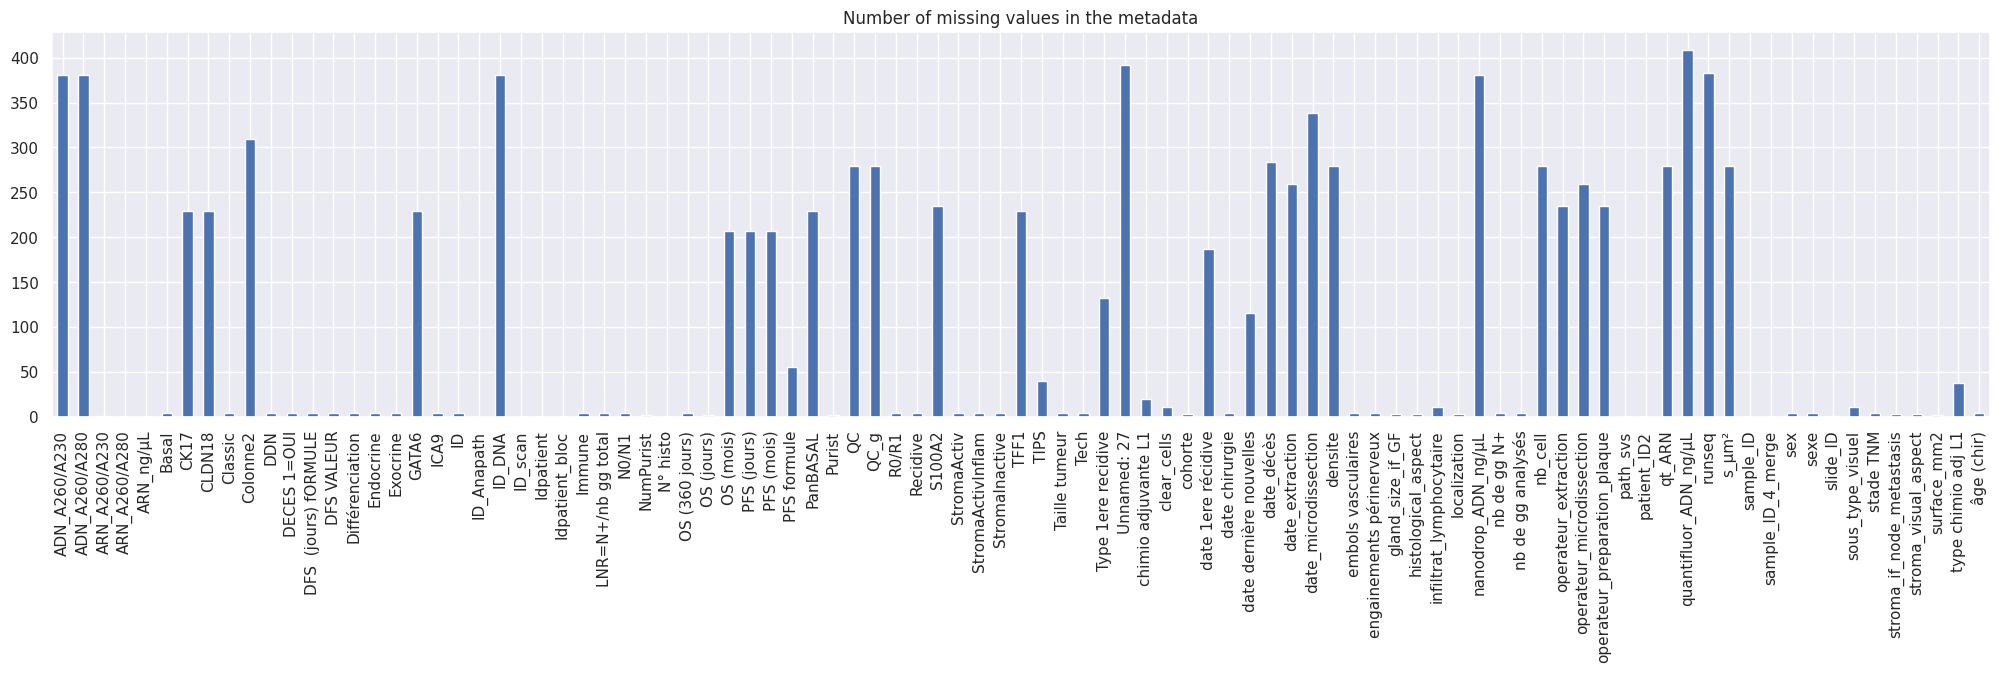

In [4]:
# Count the nan values in the metadata
metadata.isna().sum().sort_index().plot(kind='bar',
                                        title='Number of missing values in the metadata',
                                        figsize=(25, 5));

In [5]:
# Save the RNA-seq and metadata to pickle files
rna_seq.to_pickle('data/PDAC_MICRODISSEC_NAIF/rna_seq.pkl')
metadata.to_pickle('data/PDAC_MICRODISSEC_NAIF/rna_seq_metadata.pkl')